In [275]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [299]:
elemList = {'C':[6,4],'N':[7,5],'O':[8,6],'P':[15,5],'S':[16,6]} # 'Si':[14,4],'Cl':[17,7]
chargeList = range(-2,3) # from -2 to 2
hList = range(0,5)

# class dualLigand():
#     def __init__(self, atom1, atom2):
#         self.atom1 = atom1 
#         self.atom2 = atom2 
#     def updateValence():
#         v1 = self.atom1.numValE
#         v2 = self.atom2.numValE
#         if v1==v2 and v1==7:
#             self.atom1.updateValence(1)
#             self.atom2.updateValence(1)
#         if v1==v2 and v1==6:
#             self.atom1.updateValence(2)
#             self.atom2.updateValence(2)
            
class ligand():
    def __init__(self, name, numberOfHs, charge):
        self.name = name
        self.charge = charge
        self.numberOfHs = numberOfHs
        self.numberOfEs = numberOfEs
        self.getNumE()
    def print_name(self):
        print(self.name)
    
    def print_charge(self):
        print(self.charge)
    
    def print_numberOfHs(self):
        print(self.numberOfHs)
    
    def setCharge(self,charge):
        self.charge = charge
        self.getNumE()
        
    def incrCharge(self):
        self.charge += 1
        self.getNumE()
        
    def decrCharge(self):
        self.charge -= 1
        self.getNumE()
        
    def addH(self):
        self.numberOfHs += 1
        self.getNumE()
        
    def rmH(self):
        self.numberOfHs -= 1
        self.getNumE()
        
    def getNumE(self):
        self.numValE = elemList[self.name][1]
        self.numE = elemList[self.name][0]
        mod = self.numberOfHs - self.charge
        self.numValE += mod
        self.numE += mod
        
    def getSmiles(self):
        self.SMILES =  "["+ self.name + "".join(["H" for i in range(0,self.numberOfHs)]) 
        self.SMILES += "".join(["+" if self.charge>0  else "-" for i in range(0,abs(self.charge))]) + "]"
    
    def testOctetRule(self):
        result = 8 - self.numValE
        return(result)
    
    def testValenceShell(self):
        result =  int(not self.numValE%2)
        return(result)
        
    def score(self):
        score = self.testValenceShell()*(10-(-1.5*self.testOctetRule() if self.testOctetRule() < 0 else self.testOctetRule()))
        return(score + random.uniform(-1,1))

In [300]:
# generate exhaustive output list
outputList = list()
for elem in elemList.keys():
    for charge in chargeList:
        l = ligand(elem, 0, 0)
        l.setCharge(charge)
        for h in hList:
            if h:
                l.addH()
            l.getSmiles()
            outputList.append([l.SMILES,l.numE,l.numValE,l.charge,l.testOctetRule(),l.testValenceShell(),l.score()])
    

# create list of isoelectronic ligands
isoList = []  
veList = []
score = []
for line in outputList:
    isoList.append(line[1]) # unsorted list of the total amount of e
    veList.append(line[2]) # unsorted list of the amount of VE
    score.append(line[-1])

isoLigands = {} # dictionary of ligands with key: number of electrons, values: 
for i in np.unique(isoList):
    d[i] = []

for line in outputList:
    d[line[1]].append(line)


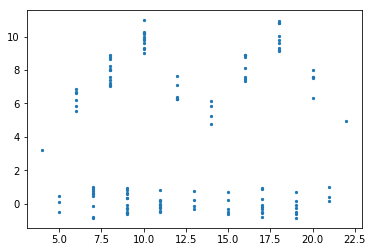

In [302]:
plt.scatter(isoList, score, s = 5)

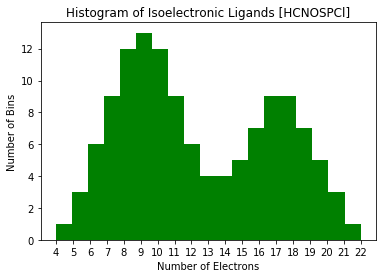

In [258]:
numBins = len(np.unique(isoList))

plt.hist(isoList, bins = numBins, facecolor='green')
plt.xlabel('Number of Electrons')
plt.ylabel('Number of Bins')
plt.title('Histogram of Isoelectronic Ligands [HCNOSPCl]')
plt.xticks(np.unique(isoList))
plt.savefig('hist_iso_ligands_HCNOSPCl.pdf', bbox_inches='tight')
plt.show()


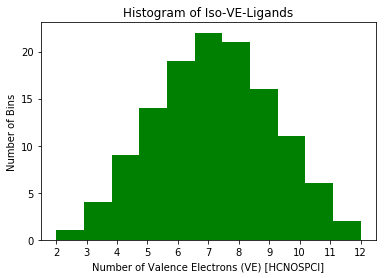

In [259]:
numBins = len(np.unique(veList))

plt.hist(veList, bins = numBins, facecolor='green')
plt.xlabel('Number of Valence Electrons (VE) [HCNOSPCl]')
plt.ylabel('Number of Bins')
plt.title('Histogram of Iso-VE-Ligands')
plt.xticks(np.unique(veList))
plt.savefig('hist_isove_ligands_HCNOSPCl.pdf', bbox_inches='tight')
plt.show()


In [89]:
for elem in elemList:
    for charge in chargeList:
        for h in hList:
            numberOfEs = elemList.get(elem) + charge + h
            l = ligand(elem, h, charge, numberOfEs)
            l.numValE


TypeError: can only concatenate list (not "int") to list

In [23]:
from molSimplify.Classes.mol3D import * #import the mol3D class
path = '/Users/adityanandy/Desktop/ni_2_acac_2_ammonia_1_hydroxyl_1_s_2'
my_mol = mol3D() #Assign the mol3D class in local frame
my_mol.readfromxyz(path) # Look at specified XYZ File
metal_ind = my_mol.findMetal()[0] # Obtain index from metal list
bonded_atoms = my_mol.getBondedAtoms(metal_ind) #Check what's bonded to that metal
metal_coord = my_mol.getAtomCoords(metal_ind)
bondlengths = []
for i in bonded_atoms:
    connect_coord = my_mol.getAtomCoords(i)
    dist = distance(metal_coord,connect_coord)
    bondlengths.append(dist) #store in list
    print('The bond length between the metal and atom '+str(i)+' is '+str(dist)+' Angstrom.')

SyntaxError: invalid syntax (<ipython-input-23-b31a06ad6f59>, line 1)